## PyTorch 학습 레벨 2 - 005
---

### 추가실습

#### Question 1
- keras를 이용한 mnist 손글씨 분류기를 학습시키는 과정. 아래의 코드와 동등한 역할을 수행할 수 있는 코드를 pytorch를 이용하여 작성할 것

##### Keras 코드

In [4]:
def show_hist_plot(acc, val_acc, loss, val_loss):
    import matplotlib.pyplot as plt

    fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(12, 4))

    loss_ax.plot(loss, 'b', label='train loss')
    loss_ax.plot(val_loss, 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(acc, 'b', label='train acc')
    acc_ax.plot(val_acc, 'r', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.legend(loc='upper left')

- 코드 출처 : https://keras.io/examples/vision/mnist_convnet/

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
########################################################### 
# Prepare the data
###########################################################
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples



In [8]:
########################################################### 
# Build the model
###########################################################
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
print()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7620 - loss: 0.7647 - val_accuracy: 0.9768 - val_loss: 0.0830
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9638 - loss: 0.1178 - val_accuracy: 0.9843 - val_loss: 0.0540
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9731 - loss: 0.0896 - val_accuracy: 0.9875 - val_loss: 0.0460
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9791 - loss: 0.0681 - val_accuracy: 0.9875 - val_loss: 0.0408
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9815 - loss: 0.0588 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9831 - loss: 0.0537 - val_accuracy: 0.9910 - val_loss: 0.0348
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9905 - val_loss: 0.0326
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accu

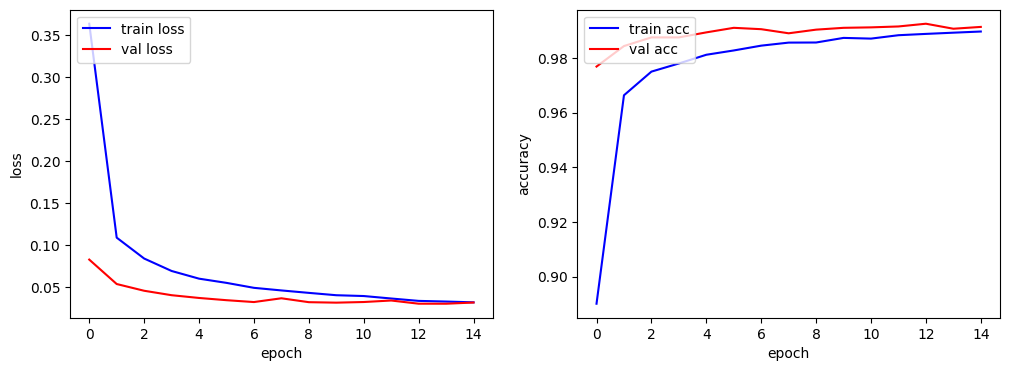

In [9]:
########################################################### 
# Train the model
###########################################################
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
show_hist_plot(hist.history['accuracy'], hist.history['val_accuracy'], 
               hist.history['loss'], hist.history['val_loss'])
print()

In [10]:
########################################################### 
# Evaluate the trained model
###########################################################
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.023951103910803795
Test accuracy: 0.991599977016449


##### 정확도 0.9915*

##### PyTorch 코드

In [11]:
########################################################### 
# Setup
###########################################################
import torch
import torchvision

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
device

'cuda'

In [14]:
########################################################### 
# Prepare the data
###########################################################
from torchvision.transforms import ToTensor, Lambda
from sklearn.model_selection import train_test_split
import numpy as np

num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
# Scale images to the [0, 1] range
preprocess = Lambda(lambda x: x.float())
train_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=preprocess
)

 
test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=preprocess
)

(x_train, y_train), (x_test, y_test) = (train_data.data, train_data.targets), (test_data.data, test_data.targets)

# Make sure images have shape (1, 28, 28)
x_train = x_train.view(-1, 1, 28, 28)
x_test = x_test.view(-1, 1, 28, 28)


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n")
print("-------------------------------------")
                       
# convert class vectors to binary class matrices
# Pytorch에서 사용되는 CrossEntropy는 one-hot encoding 형태를 지원하지 않기 때문에 해당과정을 생략합니다.


# train 중 10%를 validaiton set으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "valid samples")
print(x_test.shape[0], "test samples\n")

train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(x_val, y_val)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

Using downloaded and verified file: data\MNIST\raw\train-images-idx3-ubyte.gz
Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Using downloaded and verified file: data\MNIST\raw\train-labels-idx1-ubyte.gz
Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.61MB/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

x_train shape: torch.Size([60000, 1, 28, 28])
60000 train samples
10000 test samples

-------------------------------------
54000 train samples
6000 valid samples
10000 test samples



In [17]:
!pip install torchsummary

In [18]:
########################################################### 
# Build the model
###########################################################
import torch.nn as nn
from torchsummary import summary
import time

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Dropout(0.5),
    nn.Linear(1600, 10)
#     nn.Softmax(dim=1)
).to(device)


summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
           Flatten-7                 [-1, 1600]               0
           Dropout-8                 [-1, 1600]               0
            Linear-9                   [-1, 10]          16,010
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.53
Params size (MB): 0.13
Estimated Total Size (MB): 0.66
---------------------------------------------

Epoch 1/15
loss: 0.74811 - accuracy: 0.89170 - val_loss: 0.18597 - val_accuracy: 0.94300

Epoch 2/15
loss: 0.14916 - accuracy: 0.95537 - val_loss: 0.16272 - val_accuracy: 0.95600

Epoch 3/15
loss: 0.12742 - accuracy: 0.96209 - val_loss: 0.12600 - val_accuracy: 0.96267

Epoch 4/15
loss: 0.11927 - accuracy: 0.96485 - val_loss: 0.15119 - val_accuracy: 0.96017

Epoch 5/15
loss: 0.10879 - accuracy: 0.96830 - val_loss: 0.12428 - val_accuracy: 0.96133

Epoch 6/15
loss: 0.09886 - accuracy: 0.97006 - val_loss: 0.11903 - val_accuracy: 0.96500

Epoch 7/15
loss: 0.08942 - accuracy: 0.97283 - val_loss: 0.11245 - val_accuracy: 0.96733

Epoch 8/15
loss: 0.08058 - accuracy: 0.97609 - val_loss: 0.10394 - val_accuracy: 0.96917

Epoch 9/15
loss: 0.07094 - accuracy: 0.97793 - val_loss: 0.10979 - val_accuracy: 0.96983

Epoch 10/15
loss: 0.06815 - accuracy: 0.97848 - val_loss: 0.09562 - val_accuracy: 0.97283

Epoch 11/15
loss: 0.06583 - accuracy: 0.98000 - val_loss: 0.09175 - val_accuracy: 0.97417

Epoch 12

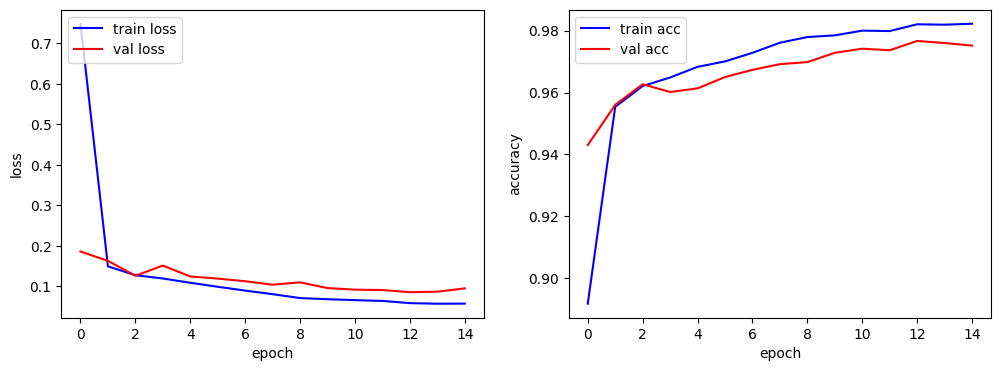

In [19]:
########################################################### 
# Train the model
###########################################################
batch_size = 128
epochs = 15

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    total_loss, total_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        X, y = X.to(device).float(), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # train loss, train acc 계산
        with torch.no_grad():
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            total_acc += (pred.argmax(1) == y).type(torch.float).sum().item()

    return total_loss / num_batches, total_acc / size

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    return test_loss / num_batches, correct / size

history = {
    'accuracy' : [],
    'val_accuracy' : [],
    'loss' : [],
    'val_loss' : []
}

for t in range(epochs):
    print(f"Epoch {t+1}/{epochs}")
    train_loss, train_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    val_loss, val_acc = test_loop(val_dataloader, model, loss_fn)

    history['accuracy'].append(train_acc)
    history['loss'].append(train_loss)
    history['val_accuracy'].append(val_acc)
    history['val_loss'].append(val_loss)

    print(f"loss: {train_loss:>.5f} - accuracy: {train_acc:>.5f} - val_loss: {val_loss:>.5f} - val_accuracy: {val_acc:>.5f}\n")

show_hist_plot(history['accuracy'], history['val_accuracy'], 
               history['loss'], history['val_loss'])

In [20]:
########################################################### 
# Evaluate the trained model
###########################################################
test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 0.0897263905823325
Test accuracy: 0.9774


##### 정확도 0.9774*